<a href="https://colab.research.google.com/github/nicafaynberg/DH_classes/blob/master/Homework_November_%22HW1_Graph_theory_ipynb%22_Nika_Faynberg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Домашняя работа 1.** (до 5 ноября)


In [ ]:
import nltk
nltk.download('brown')
from nltk.corpus import brown

Я взяла не предложения, а готовые биграммы из пакета, по категории news. Понимаю, что в задании было по-другому, но мне очень трудна эта домашка, поэтому я решила начать с более легкого.

In [3]:
from nltk.corpus import stopwords
nltk.download('stopwords')
word = nltk.corpus.brown.words(categories="news")
stop = stopwords.words('english')
res = nltk.FreqDist(nltk.bigrams(w for w in word if w.isalpha() and w not in stop)).most_common(50)
new_list_of_tuples = []
for t in res:
  e1 = t[0][0]
  e2 = t[0][1]
  e3 = t[1]
  tt = (e1, e2, e3)
  new_list_of_tuples.append(tt)
print(new_list_of_tuples)
#for element in res: 
 # new = tuple(j for i in ((x, y), z) for j in (i if isinstance(i, tuple) else (i,)))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[('New', 'York', 52), ('per', 'cent', 50), ('United', 'States', 37), ('last', 'year', 31), ('White', 'House', 29), ('last', 'week', 29), ('said', 'The', 24), ('He', 'said', 23), ('home', 'runs', 23), ('President', 'Kennedy', 20), ('The', 'President', 18), ('I', 'think', 18), ('last', 'night', 17), ('years', 'ago', 15), ('San', 'Francisco', 15), ('said', 'would', 14), ('Premier', 'Khrushchev', 13), ('Kansas', 'City', 13), ('high', 'school', 12), ('said', 'I', 12), ('Los', 'Angeles', 12), ('United', 'Nations', 11), ('New', 'Orleans', 11), ('He', 'also', 10), ('High', 'School', 10), ('vice', 'president', 10), ('sales', 'tax', 10), ('The', 'first', 10), ('American', 'Catholic', 10), ('Mantle', 'Maris', 10), ('The', 'jury', 9), ('year', 'The', 9), ('would', 'like', 9), ('El', 'Paso', 9), ('In', 'addition', 9), ('first', 'time', 9), ('Rules', 'Committee', 9), ('Air', 'Force', 9), ('

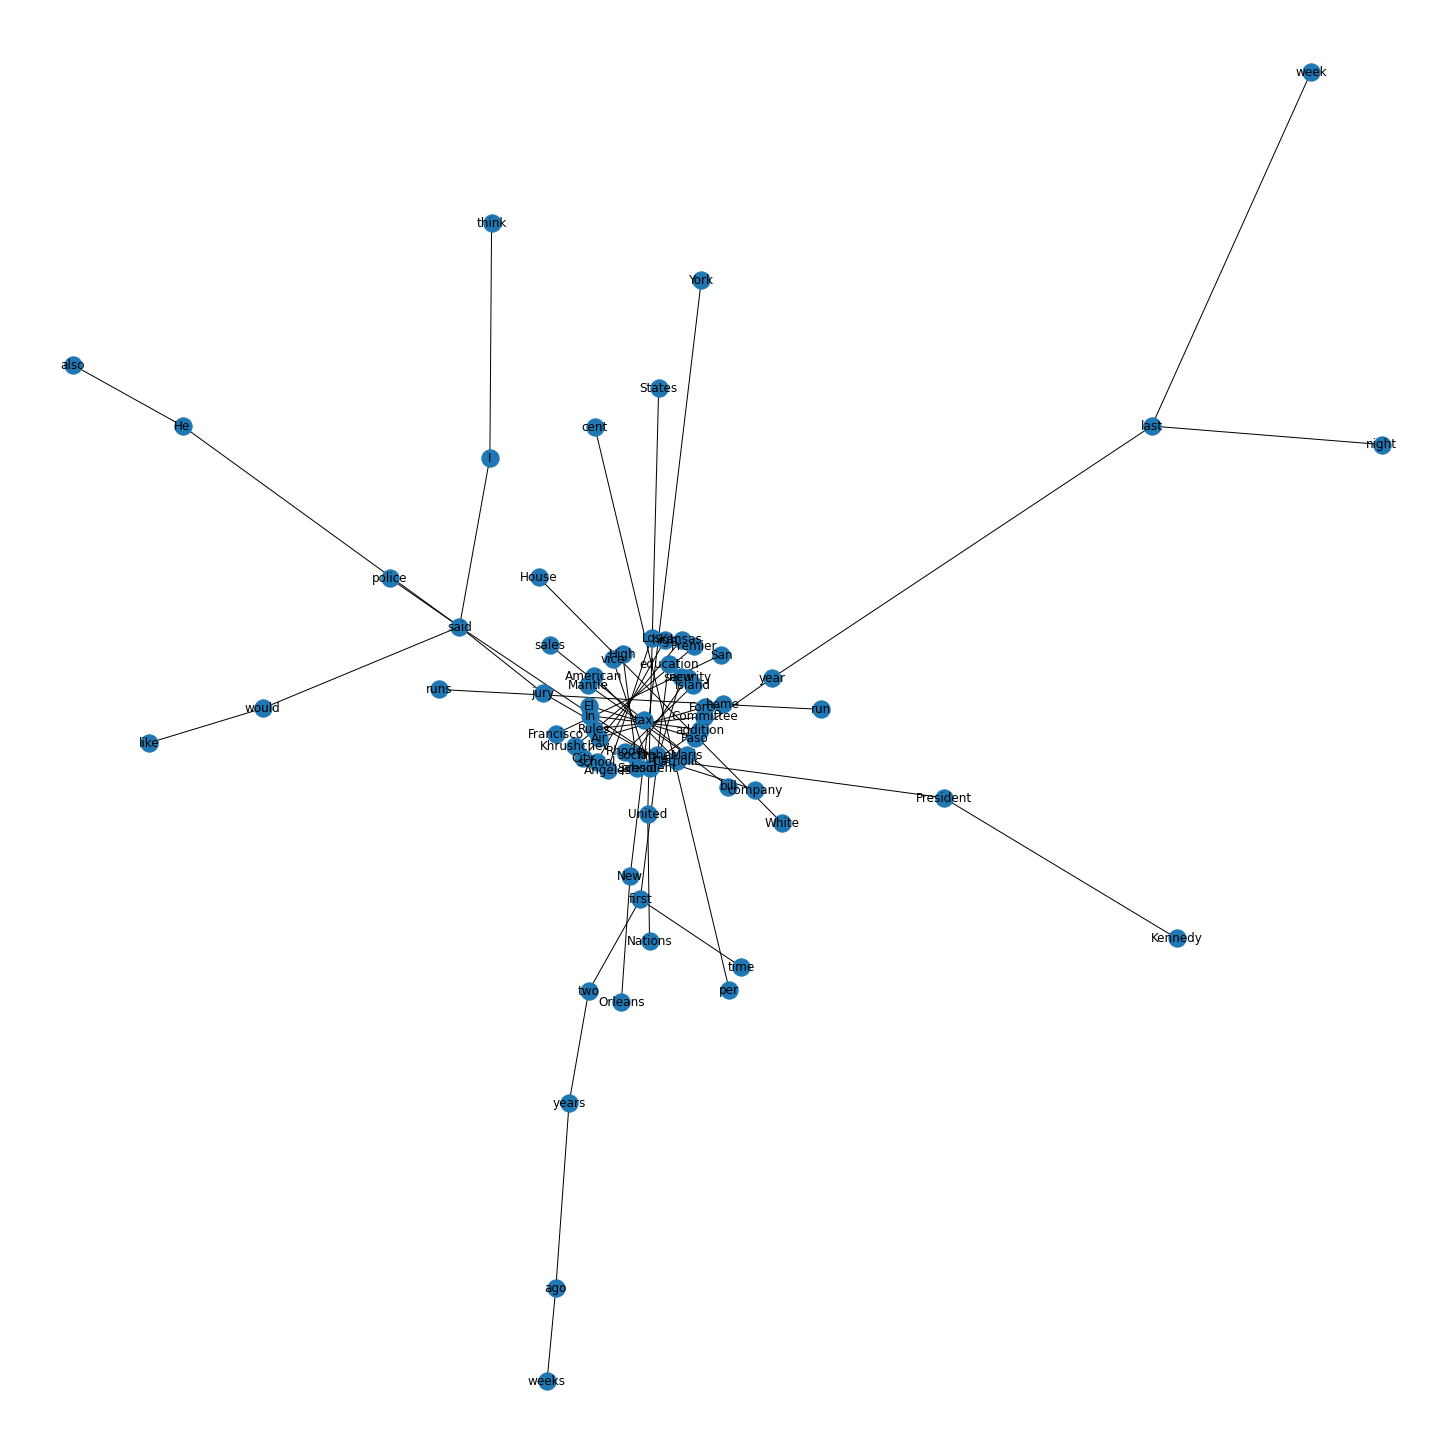

In [113]:
import networkx as nx
from typing import List
import matplotlib.pyplot as plt
# create indirected graph (0.5 points)
# create directed grpah (0.5 points)
# create function which can work with different window size (from 1 to 7) (1 point)
G = nx.Graph()
G.add_weighted_edges_from(new_list_of_tuples)
plt.figure(figsize=(20, 20))
nx.draw_kamada_kawai(G, with_labels=True)

In [114]:
import matplotlib.pyplot as plt
# nx.spring_layout(g) создает позиции для вершин графа, именно там они и будут отрисованы
# больше layouts тут, порпобуйте - не пожалеете 
# https://networkx.org/documentation/stable/reference/drawing.html#module-networkx.drawing.layout

## Descriptive analysis
Посмотрите сколько компонент, вершин, ребер. Если компонент несколько, не забывайте при анализе это учитывать. Плотность. Средняя степень вершины в графе. (2 points)

In [68]:
from networkx import number_of_nodes
print(number_of_nodes(G))
from networkx import number_of_edges
print(number_of_edges(G))

72
50


In [69]:
from networkx import density 
density(G)
#Плотность такая: 0.019561815336463225 (то есть довольно маленькая). 

0.019561815336463225

In [60]:
from networkx import number_connected_components
number_connected_components(G)

23


*   Расcчитайте распределние степеней вершин внутри графа и постройте график (1 point)


*   Сделайте log-log scale для этих значений (1 point) 


*   Проверьте, если здесь powerlaw distribution (1 point) (то есть постройте апроксимирующую прямую) Дайте анализ результатам с учетом того, что ваш граф не является scale-free network 


тут есть пример - https://networkx.org/documentation/stable/auto_examples/drawing/plot_degree_histogram.html 

[Text(0, 0, '7'),
 Text(0, 0, '6'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '1')]

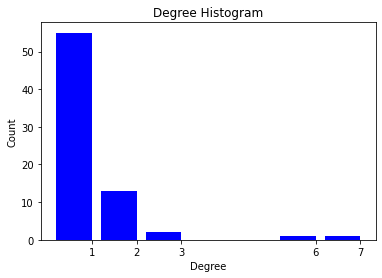

In [7]:
#График распределения степеней вершин
#код из документации
import collections
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color="b")

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

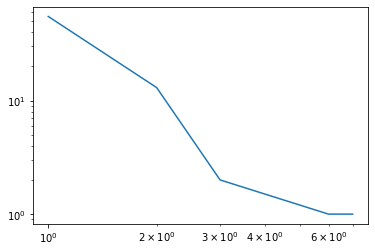

In [130]:
#log-log scale
plt.loglog(deg,cnt)


In [138]:
#Про аппроксимирующую прямую не поняла

In [118]:
import matplotlib.pyplot as plt
#plt.hist()


Попробовала, как выглядят разные центральности, остановилась просто на degree centrality, с ней выглядит интереснее всего. Центральности разделены по примерной, определенной вручную границе. По этому разделению узлам и назначался размер. Хотя есть и другой способ, более автоматизированный: node_size = range(количество узлов). Но в данном случае вручную показалось более интересным, потому что центральности у них у всех очень маленькие и если автоматически распределить по размерам, то особой разницы не видно (знаю, что для настоящего исследования это плохой аргумент).

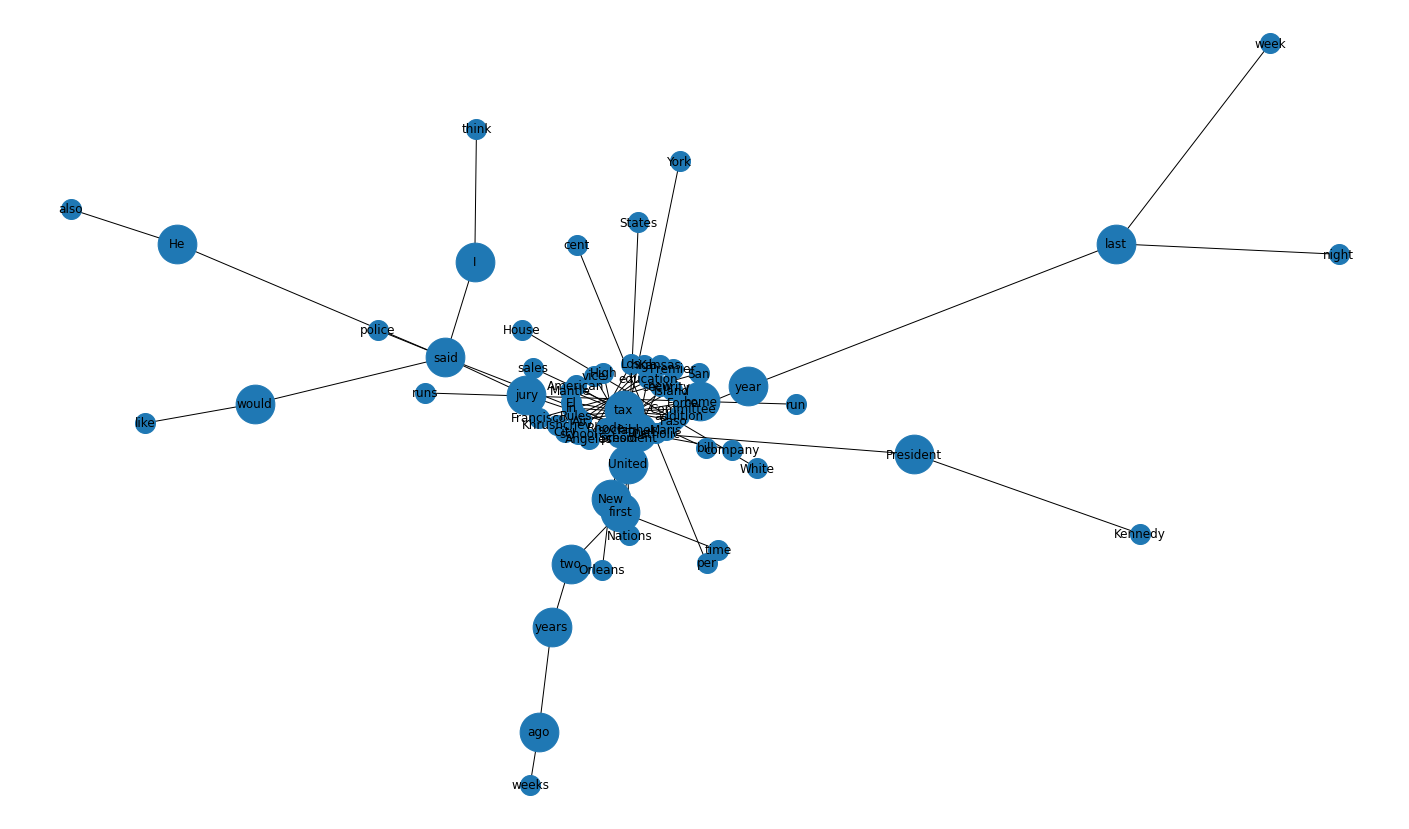

In [124]:
d = nx.degree_centrality(G)
plt.figure(figsize=(25, 15))
G.add_weighted_edges_from(new_list_of_tuples)    
large = []
small = []
for key, value in d.items():
    if value > 0.0150: 
        large.append(key)
    else:
        small.append(key)

layout = nx.kamada_kawai_layout(G)

nx.draw_networkx_edges(G, layout)
nx.draw_networkx_nodes(G, layout, nodelist=large, node_size=1500)
nx.draw_networkx_nodes(G, layout, nodelist=small, node_size=400)
# node_size = range(72)
# nx.draw(G, layout)
nx.draw_networkx_labels(G, layout, font_size=12)
plt.axis("off")

plt.show()

# Поиск сообществ
Это мне как-то не удалось уже

In [125]:
from networkx.algorithms.community.centrality import girvan_newman
comp = girvan_newman(G)
result = {i:words for i, words in enumerate(tuple(sorted(c) for c in next(comp)))}
# бинарное разбиение исходного графа на сообщетва
result

{0: ['New', 'Orleans', 'York'],
 1: ['cent', 'per'],
 2: ['Nations', 'States', 'United'],
 3: ['Kennedy',
  'President',
  'The',
  'ago',
  'company',
  'first',
  'last',
  'new',
  'night',
  'time',
  'two',
  'week',
  'weeks',
  'year',
  'years'],
 4: ['House', 'White'],
 5: ['He', 'I', 'also', 'jury', 'like', 'police', 'said', 'think', 'would'],
 6: ['home', 'run', 'runs'],
 7: ['Francisco', 'San'],
 8: ['Khrushchev', 'Premier'],
 9: ['City', 'Kansas'],
 10: ['high', 'school'],
 11: ['Angeles', 'Los'],
 12: ['High', 'School'],
 13: ['president', 'vice'],
 14: ['bill', 'sales', 'tax'],
 15: ['American', 'Catholic'],
 16: ['Mantle', 'Maris'],
 17: ['El', 'Paso'],
 18: ['In', 'addition'],
 19: ['Committee', 'Rules'],
 20: ['Air', 'Force'],
 21: ['Island', 'Rhode'],
 22: ['security', 'social'],
 23: ['education', 'higher']}

In [ ]:
subset_color = [
    "gold",
    "violet",
    "limegreen",
    "darkorange",
]
color = []
for v in G.nodes():
  for i, words in result.items():
    if v in words:
      color.append(subset_color[i])
plt.figure(figsize=(20, 10))

nx.draw(G, pos, node_color=color, with_labels=True)
plt.show()

Ваша задача: применить методы поиска сообществ и попытаться интерпретировать выдачу (3 points)

In [ ]:
import networkx.algorithms.community as nx_comm
part = community

In [ ]:
import itertools
k = 2
# Посмотрим чуть глубже: 2 означает еще две итерации деления на сообщества  
for communities in itertools.islice(comp, k):
    print({indx: words for indx, words in enumerate(tuple(sorted(c) for c in communities))})  

Подарок для вас со стак оферфлоу: отрисовка графовой кластеризации с помощью дендрограммы (работает только с выходом из функции girvan_newman)

In [ ]:
import networkx as nx
from itertools import chain, combinations
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from networkx.algorithms.community.centrality import subset_rank_dict

# my function to get a merge height so that it is unique (probably not that efficient)
def get_merge_height(sub, node_labels, subset_rank_dict):
    sub_tuple = tuple(sorted([node_labels[i] for i in sub]))
    n = len(sub_tuple)
    other_same_len_merges = {k: v for k, v in subset_rank_dict.items() if len(k) == n}
    min_rank, max_rank = min(other_same_len_merges.values()), max(other_same_len_merges.values())
    range = (max_rank-min_rank) if max_rank > min_rank else 1
    return float(len(sub)) + 0.8 * (subset_rank_dict[sub_tuple] - min_rank) / range

def plot_dendrogram(G, method_to_find_community = girvan_newman):
  communities = list(method_to_find_community(G))
  # building initial dict of node_id to each possible subset:
  node_id = 0
  init_node2community_dict = {node_id: communities[0][0].union(communities[0][1])}
  for comm in communities:
      for subset in list(comm):
          if subset not in init_node2community_dict.values():
              node_id += 1
              init_node2community_dict[node_id] = subset

  # turning this dictionary to the desired format in @mdml's answer
  node_id_to_children = {e: [] for e in init_node2community_dict.keys()}
  for node_id1, node_id2 in combinations(init_node2community_dict.keys(), 2):
      for node_id_parent, group in init_node2community_dict.items():
          if len(init_node2community_dict[node_id1].intersection(init_node2community_dict[node_id2])) == 0 and group == init_node2community_dict[node_id1].union(init_node2community_dict[node_id2]):
              node_id_to_children[node_id_parent].append(node_id1)
              node_id_to_children[node_id_parent].append(node_id2)

  # also recording node_labels dict for the correct label for dendrogram leaves
  node_labels = dict()
  for node_id, group in init_node2community_dict.items():
      if len(group) == 1:
          node_labels[node_id] = list(group)[0]
      else:
          node_labels[node_id] = ''

  # also needing a subset to rank dict to later know within all k-length merges which came first
  subset_rank_dict = dict()
  rank = 0
  for e in communities[::-1]:
      for p in list(e):
          if tuple(p) not in subset_rank_dict:
              subset_rank_dict[tuple(sorted(p))] = rank
              rank += 1
  subset_rank_dict[tuple(sorted(chain.from_iterable(communities[-1])))] = rank

  # finally using @mdml's magic, slightly modified:
  G           = nx.DiGraph(node_id_to_children)
  nodes       = G.nodes()
  leaves      = set( n for n in nodes if G.out_degree(n) == 0 )
  inner_nodes = [ n for n in nodes if G.out_degree(n) > 0 ]

  # Compute the size of each subtree
  subtree = dict( (n, [n]) for n in leaves )
  for u in inner_nodes:
      children = set()
      node_list = list(node_id_to_children[u])
      while len(node_list) > 0:
          v = node_list.pop(0)
          children.add( v )
          node_list += node_id_to_children[v]
      subtree[u] = sorted(children & leaves)

  inner_nodes.sort(key=lambda n: len(subtree[n])) # <-- order inner nodes ascending by subtree size, root is last

  # Construct the linkage matrix
  leaves = sorted(leaves)
  index  = dict( (tuple([n]), i) for i, n in enumerate(leaves) )
  Z = []
  k = len(leaves)
  for i, n in enumerate(inner_nodes):
      children = node_id_to_children[n]
      x = children[0]
      for y in children[1:]:
          z = tuple(sorted(subtree[x] + subtree[y]))
          i, j = index[tuple(sorted(subtree[x]))], index[tuple(sorted(subtree[y]))]
          Z.append([i, j, get_merge_height(subtree[n], node_labels, subset_rank_dict), len(z)]) # <-- float is required by the dendrogram function
          index[z] = k
          subtree[z] = list(z)
          x = z
          k += 1

  plt.figure(figsize=(15, 15))
  dendrogram(Z, labels=[node_labels[node_id] for node_id in leaves])
  plt.xticks(fontsize=12)
  plt.show()#

plot_dendrogram(g)

Можете применить при подготовке корпуса любые другие фишки, котоыре вы умеете использовать, как то снятие частеречной омонимии и прочее. Инициатива поощряется, без нее 10 не поставлю :)